# GLBL 5010 - Assignment 1

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk2_accounting.csv?raw=true'
df = pd.read_csv(url, sep='\t')

In [3]:
alpha = 0.3

## Task 1a

$Y = AK^{0.3}L^{0.7}$

$\frac{Y}{L} = \frac{AK^{0.3}}{L}$

$y = Ak^{0.3}$

## Task 1b

In [4]:
# Calculate GDP per capita for 1960 and 2018, and compute growth rate

gdppc60 = df['cgdpo1960'] / df['pop1960']
gdppc18 = df['cgdpo2018'] / df['pop2018']

n = 2018-1960
g = np.log(gdppc18/gdppc60)/n

df['y1960'] = gdppc60
df['y2018'] = gdppc18
df['growth'] = g

In [5]:
# Set up the regression model

Y = df['growth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.816
Date:                Sat, 24 Jan 2026   Prob (F-statistic):              0.181
Time:                        16:07:21   Log-Likelihood:                 282.16
No. Observations:                 102   AIC:                            -560.3
Df Residuals:                     100   BIC:                            -555.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      0.013      3.198      0.0

The predicted average change in growth rate between 1960 and 2018 is -0.21% if a country's GDPPC in 1960 increased by one unit. As the slope is negative, the OLS signals possible convergence. However, the results are not significant.

## Task 1c

In [6]:
# Calculate capital per worker and total factor productivity for 1960 and 2018

df["k1960"] = df["cn1960"] / df["pop1960"]
df["k2018"] = df["cn2018"] / df["pop2018"]

df['A1960'] = df['y1960'] / df['k1960']**alpha
df['A2018'] = df['y2018'] / df['k2018']**alpha

In [7]:
# Take natural logarithms of relevant variables

df['lny1960'] = np.log(df['y1960'])
df['lnA1960'] = np.log(df['A1960'])
df['lnk1960'] = np.log(df['k1960'])

df['lny2018'] = np.log(df['y2018'])
df['lnA2018'] = np.log(df['A2018'])
df['lnk2018'] = np.log(df['k2018'])

In [8]:
# Display summary statistics for lnA1960

df['lnA1960'].describe()

count    102.000000
mean       5.366537
std        0.620780
min        3.187132
25%        4.916053
50%        5.388751
75%        5.826132
max        6.636096
Name: lnA1960, dtype: float64

## Task 1d

Text(0.5, 1.0, 'lnA1960 vs lny1960')

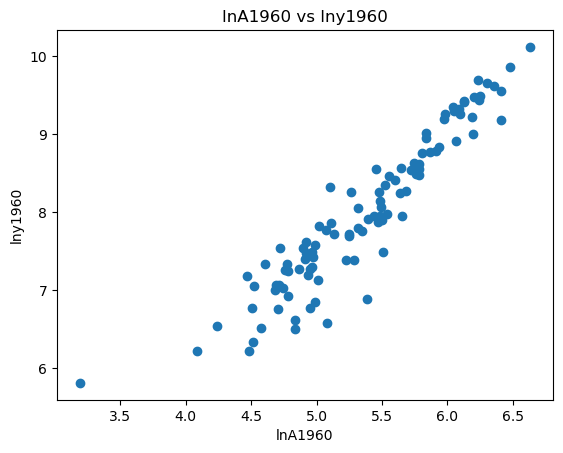

In [9]:
# Create scatter plot of lnA1960 vs lny1960

plt.scatter(df['lnA1960'], df['lny1960'])
plt.xlabel('lnA1960')
plt.ylabel('lny1960')
plt.title('lnA1960 vs lny1960')

In [10]:
# Calculate Pearson correlation coefficient between lnA1960 and lny1960

correlation_matrix = np.corrcoef(df['lny1960'].dropna(), df['lnA1960'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9405769655007487


There is very strong correlation between countries' gdppc in 1960 and their TFP in 1960. This means that countries which had high levels of gdppc also had high levels of TFP and vice versa.

## Task 1e

In [11]:
# Compute hypothetical GDP per capita in 2018 if all countries had USA's TFP level

usa_tfp2018 = df.loc[df["countrycode"] == "USA", 'A2018'].values[0]
df['hypA2018'] = usa_tfp2018
df['hypy2018'] = df['hypA2018'] * df['k2018']**alpha
df['hypgrowth'] = np.log(df['hypy2018'] / df['y1960']) / n

In [12]:
# Display Argentina's hypothetical GDP per capita in 2018 and growth rate

print("Argentina:")
print("Hypothetical ln y: " + str(np.round(np.log(df.loc[df['countrycode'] == 'ARG', 'hypy2018']).values[0], 2)))
print("Hypothetical y: $" + str(np.round(df.loc[df['countrycode'] == 'ARG', 'hypy2018'].values[0], 2)))
print("Hypothetical growth rate: " + str(np.round(df.loc[df['countrycode'] == 'ARG', 'hypgrowth'].values[0], 2)))

Argentina:
Hypothetical ln y: 10.72
Hypothetical y: $45459.83
Hypothetical growth rate: 0.05


## Task 1f

In [13]:
# Set up the regression model for hypothetical growth

Y = df['hypgrowth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              hypgrowth   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     437.6
Date:                Sat, 24 Jan 2026   Prob (F-statistic):           2.64e-38
Time:                        16:07:22   Log-Likelihood:                 386.74
No. Observations:                 102   AIC:                            -769.5
Df Residuals:                     100   BIC:                            -764.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1374      0.004     30.581      0.0

Assuming the same levels of TFP in 2018 for all countries massively increases the R-squared of the OLS and significance of the coefficient (to the point where the p-value is lower than 0.000). Moreover, the coefficient is now more negative than in 1B, indicating a stronger relationship between starting gdppc and growht. This indicates that the difference in tfp between countries has been a significant barrier to convergence

## Task 2a

Including human capital in the production function is valid because it provides a weight to the quality of labor in a country. Factors like education and skills affect how productive the workers of a nation can be. By including the human capital in the production function, it accounts more accurately for the variation in output without ascribing it to TFP. 

## Task 2b

In [14]:
df['y2018new'] = df['cgdpo2018'] / df['pop2018']
df['k2018new'] = df['cn2018'] / df['pop2018']
df['A2018new'] = df['y2018new'] / ((df['k2018new'] ** alpha) * df['hc2018']**(1 - alpha))

df['lny2018new'] = np.log(df['y2018new'])
df['lnk2018new'] = np.log(df['k2018new'])
df['lnA2018new'] = np.log(df['A2018new'])

In [15]:
print(f"The mean of ln A in 2018 is: {np.mean(df['lnA2018new'])}\nThe standard deviation of ln A in 2018 is: {np.std(df['lnA2018new'])}")

The mean of ln A in 2018 is: 5.534659152515033
The standard deviation of ln A in 2018 is: 0.6423298293894643


## Task 2c

                            OLS Regression Results                            
Dep. Variable:                lny2018   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     4018.
Date:                Sat, 24 Jan 2026   Prob (F-statistic):          5.48e-105
Time:                        16:07:22   Log-Likelihood:                 34.863
No. Observations:                 142   AIC:                            -65.73
Df Residuals:                     140   BIC:                            -59.81
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.154      1.073      0.2

Text(0.5, 1.0, 'lnA2018 vs lny2018')

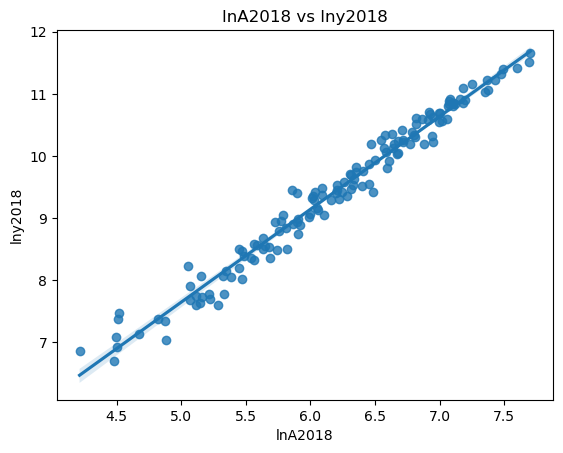

In [16]:
x4 = df['lnA2018']
x4 = sm.add_constant(x4)
y4 = df['lny2018']
mod4 = sm.OLS(y4,x4,missing='drop')
res4 = mod4.fit(cov_type="HC0")
print(res4.summary(xname=['const','ln A']))
sns.regplot(x='lnA', y='lny', data=pd.DataFrame({'lnA' : df['lnA2018'], 'lny' : df['lny2018']}) ) 
plt.xlabel('lnA2018')
plt.ylabel('lny2018')
plt.title('lnA2018 vs lny2018')

In [17]:
correlation_matrix = np.corrcoef(df['lny2018new'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9611858176665088


The correlation between ln y and ln A for the production function that accounts for human capital is higher than for the simplified model in Question 1 (R = 0.96 vs 0.94). The slope of the regression between the variables is also steeper, suggesting that when human capital is accounted for using data, the remaining factors that are part of TFP are better at explaining the differences in output per capita that are shown in the data. 

## Task 2d

Text(0.5, 1.0, 'lnA2018 vs lnA2018new')

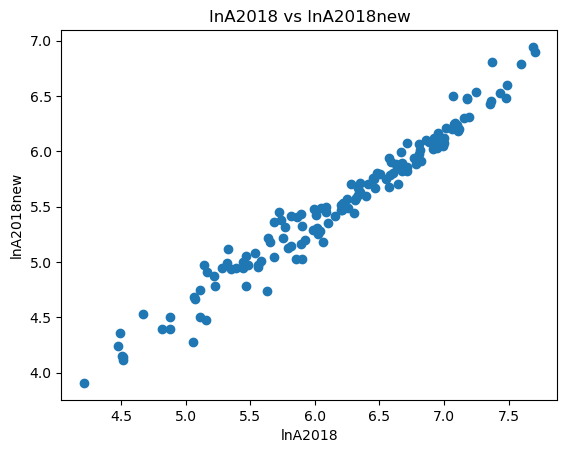

In [18]:
plt.scatter(df['lnA2018'], df['lnA2018new'])
plt.xlabel('lnA2018')
plt.ylabel('lnA2018new')
plt.title('lnA2018 vs lnA2018new')

In [19]:
correlation_matrix = np.corrcoef(df['lnA2018'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9821181768687952


The plots of ln A show a very strong correlation, with R = 0.98. However, for all countries, the TFP calculated for 2018 using the human capital were lower than when human capital is not accounted for. This makes sense, as by pulling human capital out of TFP and treating it as a separate input, the direct contribution of TFP is lower (essentially, if the old TFP values included human capital, in the new calculations that portion of TFP is taken out and treated as a standalone variable for which we have data, leaving less that needs to be accounted for by TFP).

## Task 2E

Augmenting the production function with human capital reduces our ignorance because, by definition, 
TFP includes all factors that aren't otherwise treated as an input in the production formula. By collecting data on a factor and treating it as an input, as in the case of human capital, less of the variations in output have to be explained by the otherwise rather opaque notion of TFP. The more that can be known about an economy's inputs, the less has to be ascribed to productivity/TFP. This changes the recommendations, because, by identifying human capital and education as an input, it provides another avenue by which a country or its policymakers can allocate resources and investments into growing its output by improving the quality of its labor force instead of just relying on diminishing returns of capital. 